# Лабораторная работа 4. Цифровая обработка изображений.
> Выполнена студентом: **Гришин Е.В. 22ВВИм2**

Цель лабораторной работы:
1. Бинаризация
2. Выделение границ
3. Методы анализа изображений
4. Локальные особенности. Особые точки.


## Импорт библиотек

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

import cv2 as cv
import numpy as np

image_path = 'images/bad_text.jpg'

## Загрузка изображения

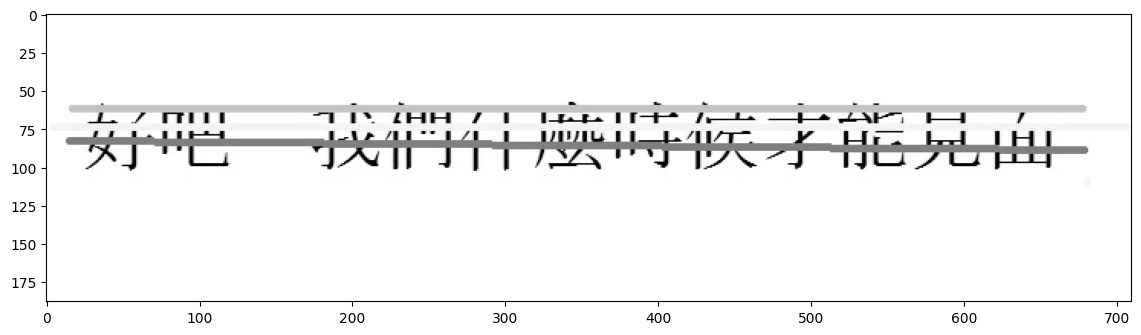

In [2]:
# Загрузка изображения
bgr_image = cv.imread(image_path)
gray_image = cv.cvtColor(bgr_image, cv.COLOR_BGR2GRAY)

plt.figure(figsize=(14, 4))
plt.imshow(gray_image, cmap='gray')

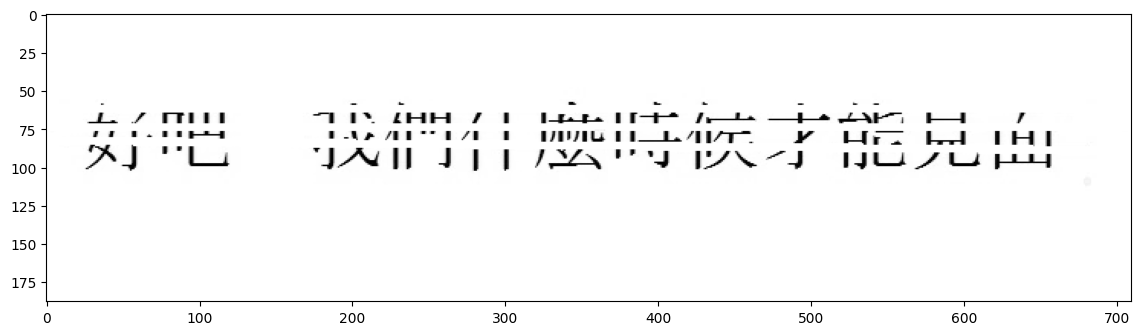

In [3]:
removed = cv.inRange(gray_image, 120, 245)
removed = cv.morphologyEx(removed, cv.MORPH_OPEN, np.ones((1, 6), np.uint8))
for _ in range(5):
    removed = cv.dilate(removed, np.ones((1, 8), np.uint8))

mask_off = cv.bitwise_or(removed, gray_image)

plt.figure(figsize=(14,4))
plt.imshow(mask_off, cmap='gray')

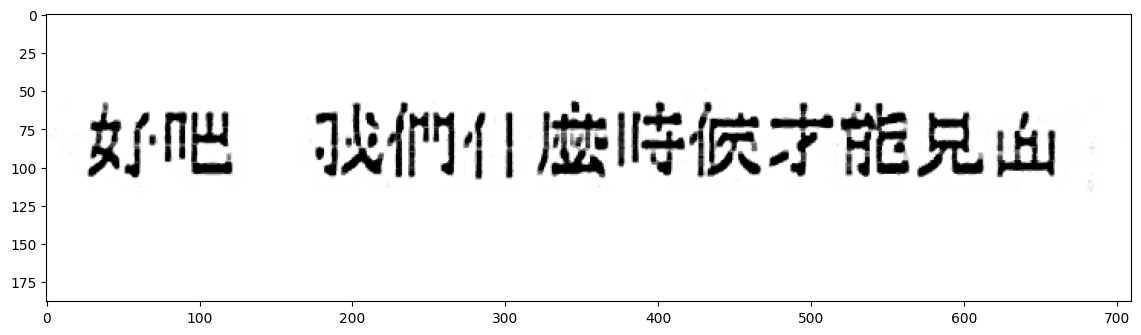

In [4]:
sharp_k = -np.ones((3, 3))
sharp_k[1, 1] = 9

eroded = cv.erode(mask_off, np.ones((6, 1), np.uint8))
blurred = cv.GaussianBlur(eroded, (9, 9), 2.0)
sharpened = cv.filter2D(blurred, -1, sharp_k)
sharpened = cv.morphologyEx(sharpened, cv.MORPH_CLOSE, np.ones((2, 2), np.uint8))
sharpened = cv.filter2D(sharpened, -1, sharp_k)
sharpened = cv.morphologyEx(sharpened, cv.MORPH_CLOSE, np.ones((2, 2), np.uint8))


cv.imwrite('images/fuller_text.png', cv.cvtColor(sharpened, cv.COLOR_GRAY2BGR))
plt.figure(figsize=(14,4))
plt.imshow(sharpened, cmap='gray')

![result image](images/better_text.png)